In [1]:
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('df_agregado.csv',sep=';')
df = df[["S3","S4","E2","E5","E6","SE1","SE2","SEG1",'RA','Cidade']].rename(columns={
    "S3":"S1",
    "S4":"S2",
    "E2":"E1",
    "E5":"E2",
    "E6":"E3",
    "SE1":"SE1",
    "SE2":"SE2",
    "SEG1":"SEG1"
})
variaveis_df_agregado = pd.DataFrame({
    'S1': ["Taxa de mortalidade fetal (por mil nascidos vivos)",1],
    'S2': ["Taxa de mortalidade por causas evitáveis (por 10.000 habitantes)",1],
    'E1': ["Média de alunos por turma no ensino fundamental",1],
    'E2': ["Taxa de defasagem idade-série no ensino fundamental",1],
    'E3': ["Taxa de reprovação no ensino fundamental",1],
    'SE1':[ "Grau de instrução dos eleitores do Brasil Esse indicador foi utilizado como proxy para o grau de escolaridade da população. Proporção da população com ensino médio ou mais concluído",-1],
    'SE2':[ "Proporção de famílias em situação de pobreza (R$ < 200) que recebe benefícios sociais (Bolsa-família, BPC/LOAS, Bolsa de estudo)",1],
    #'SE3':[ "Proporção de famílias em situação de extrema pobreza (R$ < 100) que recebe benefícios sociais (Bolsa-família, BPC/LOAS, Bolsa de estudo)",1],
    #'SE4':[ "Porcentagem da população com 65 anos ou mais",1],
    #'SE5':[ "Razão de dependência (população com menos de 15 anos e mais de 60 anos em relação à população de 15 a 60 anos)",1],
    'SEG1': ["Taxa de ocorrências de crimes e delitos registrados pela CCP (por 1.000 habitantes)",1],
    #'SEG2': ["Taxa de CVLI (Crimes Violentos Letais Intencionais) (por 100.000 habitantes)",1],
    #'POP_ESTIM': ["População estimada na Região Administrativa (RA)",1],
})
df = df[list(variaveis_df_agregado.keys()) + ['RA','Cidade']]

In [3]:
mask = df[list(variaveis_df_agregado.keys()) + ['RA', 'Cidade']].isna().any(axis=1)
df_na = df[mask]
df_na

,S1,S2,E1,E2,E3,SE1,SE2,SEG1,RA,Cidade
18,122.449,3.060163,21.144737,17.55,5.95,85.876553,NaN,4.284228,19.0,Candangolândia
21,48.485,0.903081,22.676471,12.97,5.45,98.159956,NaN,2.655059,22.0,Sudoeste/Octogonal
23,121.212,1.299770,23.535714,23.72,8.79,98.280908,NaN,1.429747,24.0,Park Way
25,23.881,1.268440,24.437500,NaN,4.45,84.737106,114.733782,2.968149,26.0,Sobradinho II
26,40.584,0.754077,29.438776,NaN,8.70,95.909498,50.191428,0.433594,27.0,Jardim Botânico
27,25.723,1.682652,25.857143,NaN,8.24,80.470402,194.052819,10.187692,28.0,Itapoã
28,NaN,NaN,22.095238,NaN,5.63,95.490369,34.427784,123.776626,29.0,SIA
29,29.953,3.054951,22.477273,NaN,5.48,92.058633,32.586115,3.716857,30.0,Vicente Pires
30,139.535,3.195569,NaN,NaN,NaN,75.553949,150.892131,2.343417,31.0,Fercal
31,NaN,NaN,NaN,NaN,NaN,84.723328,378.794923,5.460377,32.0,Sol Nascente/Pôr do Sol


In [4]:
pesos = variaveis_df_agregado.iloc[1]

In [6]:
df[pesos.index] = df[pesos.index] * pesos

In [7]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

########## impute dados na

dados_pesos = df.copy()
dados_pesos = dados_pesos.set_index('RA',inplace=False).drop('Cidade',axis=1)

imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(dados_pesos.dropna())
dados_pesos[pesos.index] = imp_mean.transform(dados_pesos)

In [8]:
df_colunas_escala = dados_pesos[variaveis_df_agregado.keys()]

scaler = StandardScaler()

# Ajustar e transformar os dados
df_colunas_escala_scaled = scaler.fit_transform(df_colunas_escala)

dados_pesos[variaveis_df_agregado.keys()] = df_colunas_escala_scaled

In [9]:
dados_pesos_final = dados_pesos.merge(df.set_index('RA',inplace=False)['Cidade'],on='RA',how='left')
dados_pesos_final[variaveis_df_agregado.keys()] = (dados_pesos_final[variaveis_df_agregado.keys()] * pesos.values).astype(float)

In [12]:
dados_pesos_final

,S1,S2,E1,E2,E3,SE1,SE2,SEG1,Cidade
RA,,,,,,,,,
1.0,-0.840523,-0.130829,-1.511451,0.175669,-0.197470,1.356558,-1.199605,0.536665,Plano Piloto
2.0,-0.669872,-0.488699,-0.041995,-0.525615,-0.668999,-0.661139,-0.634313,-0.101080,Gama
3.0,-0.855663,-0.004383,-0.349929,0.625968,0.189030,-0.019171,-0.413520,0.211048,Taguatinga
4.0,-0.407615,2.068626,0.176468,-0.053171,0.737859,-0.099828,0.308346,-0.267249,Brazlândia
5.0,-0.542700,2.424189,-0.026106,1.078727,2.276126,0.357060,0.752553,-0.253210,Sobradinho
6.0,-0.872008,0.295697,1.034675,1.708653,1.418098,-1.129477,0.478373,-0.243576,Planaltina
7.0,-0.472061,-0.170915,0.052720,-0.587131,-0.831329,-0.995612,0.794322,0.125524,Paranoá
8.0,1.008571,-0.260905,0.016806,0.023109,0.065350,0.016319,-0.382965,0.087996,Núcleo Bandeirante
9.0,-0.963786,0.570977,0.649425,0.854808,1.039328,-0.048211,0.713900,0.142226,Ceilândia


In [13]:
dados_pesos_final.select_dtypes(['number']).corr()

,S1,S2,E1,E2,E3,SE1,SE2,SEG1
S1,1.000000,-0.017403,-0.297462,-0.112004,-0.130611,0.017929,-0.062112,-0.136735
S2,-0.017403,1.000000,-0.132123,0.426223,0.298371,-0.268887,0.347779,0.006322
E1,-0.297462,-0.132123,1.000000,0.015094,0.249146,-0.001953,-0.070023,-0.201692
E2,-0.112004,0.426223,0.015094,1.000000,0.553855,-0.120309,0.241080,0.011066
E3,-0.130611,0.298371,0.249146,0.553855,1.000000,0.113689,0.057950,-0.133712
SE1,0.017929,-0.268887,-0.001953,-0.120309,0.113689,1.000000,-0.778539,0.148028
SE2,-0.062112,0.347779,-0.070023,0.241080,0.057950,-0.778539,1.000000,-0.144132
SEG1,-0.136735,0.006322,-0.201692,0.011066,-0.133712,0.148028,-0.144132,1.000000


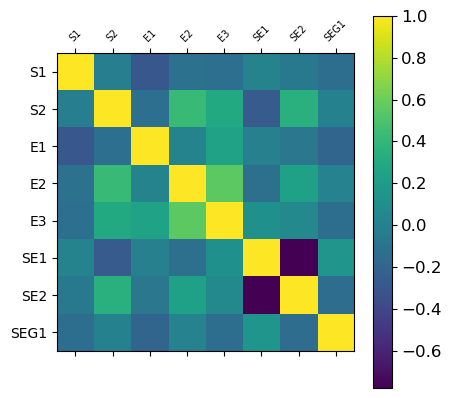

<Figure size 2000x1200 with 0 Axes>

In [14]:
plt.matshow(dados_pesos_final.select_dtypes(['number']).corr())
plt.xticks(range(dados_pesos_final.select_dtypes(['number']).shape[1]), dados_pesos_final.select_dtypes(['number']).columns, fontsize=7, rotation=45)
plt.yticks(range(dados_pesos_final.select_dtypes(['number']).shape[1]), dados_pesos_final.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
#plt.title('Matriz de correlação\n(dados_pesos com imputação e Normalizados) ', fontsize=12);
plt.figure(figsize=(20,12))
plt.show()

KElbowVisualizer(ax=<AxesSubplot: >,
                 estimator=KMeans(n_clusters=19, random_state=42), k=(1, 20))

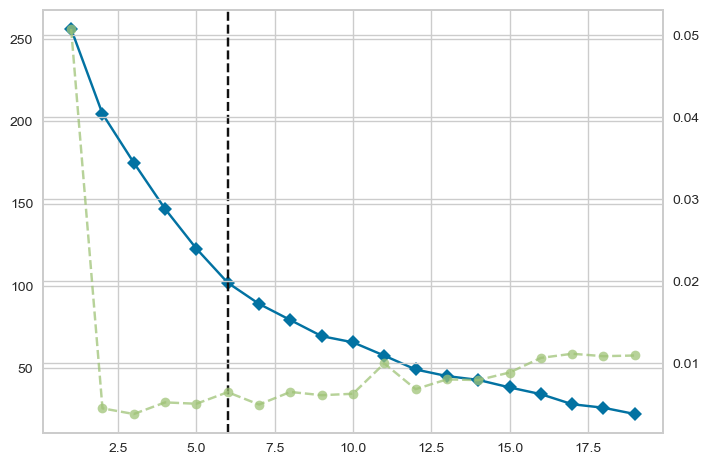

In [17]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init=10,random_state=42)
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(dados_pesos_final.loc[:, ~dados_pesos_final.columns.isin(["RA","Cidade"])])

In [18]:
KMeans_final = KMeans(n_clusters=6, random_state=2023, n_init=10).fit(dados_pesos_final.drop(['Cidade'],axis=1))

In [19]:
dados_pesos_final['cluster'] = KMeans_final.labels_

In [24]:
dados_pesos_final

Float64Index([ 1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0,
              12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0,
              23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0],
             dtype='float64', name='RA')

In [28]:
dados_pesos_final[['cluster','Cidade']].to_csv('clusters.csv',index=True)

In [28]:
dados_pesos_final.groupby('cluster').Cidade.value_counts()

cluster  Cidade                 
0        Brazlândia                 1
         Ceilândia                  1
         Itapoã                     1
         Planaltina                 1
         Riacho Fundo II            1
         SCIA/Estrutural            1
         Sobradinho                 1
         Sol Nascente/Pôr do Sol    1
         São Sebastião              1
1        Cruzeiro                   1
         Jardim Botânico            1
         Núcleo Bandeirante         1
         Paranoá                    1
         Park Way                   1
         Recanto das Emas           1
         Samambaia                  1
         Santa Maria                1
         Taguatinga                 1
2        Gama                       1
         Guará                      1
         Lago Norte                 1
         Lago Sul                   1
         Plano Piloto               1
         Sobradinho II              1
         Vicente Pires              1
         Águas Cl

In [21]:
dados_pesos_final['score_geral'] = dados_pesos_final.loc[:, ~dados_pesos_final.columns.isin(["RA","Cidade",'POP_ESTIM','score_geral'])].sum(axis=1)

In [30]:
dados_pesos_final.sort_values('score_geral',ascending=False).head(50)[['Cidade','score_geral']].values

array([['Fercal', 8.71192288150402],
       ['SIA', 6.228370917182248],
       ['Candangolândia', 5.353065981732832],
       ['Sobradinho', 5.35251879132225],
       ['SCIA/Estrutural', 5.0924096226885105],
       ['Planaltina', 4.9493885072962245],
       ['São Sebastião', 4.39261187386375],
       ['Varjão', 4.351748137703212],
       ['Ceilândia', 3.0550898178565298],
       ['Sol Nascente/Pôr do Sol', 3.0012912335224073],
       ['Brazlândia', 2.6630921271023156],
       ['Riacho Fundo II', 2.6067429638194906],
       ['Santa Maria', 2.34731029032],
       ['Itapoã', 2.323954297694225],
       ['Park Way', 1.6806899793528045],
       ['Núcleo Bandeirante', 1.541642705224059],
       ['Cruzeiro', 1.2810136081967691],
       ['Recanto das Emas', 0.9539004029745761],
       ['Paranoá', 0.9067429621793357],
       ['Taguatinga', 0.4217210395777513],
       ['Jardim Botânico', 0.2699324366266507],
       ['Lago Norte', -0.07136888739979419],
       ['Samambaia', -0.16545630473667394],
 

In [32]:
dados_pesos_final.groupby('cluster').median('score_geral').sort_values('score_geral',ascending=False)['score_geral']

cluster
5    6.228371
4    5.353066
0    3.055090
1    0.953900
2   -1.383545
3   -3.759055
Name: score_geral, dtype: float64